In [3]:
import struct
import numpy as np
from sklearn import neighbors,metrics
import matplotlib.pyplot as plt
%matplotlib inline


/home/raghvendra/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/raghvendra/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
 def read_idx(filename):
        with open(filename,'rb') as f:
            zero,data_type,dims = struct.unpack('>HBB',f.read(4))
            shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
            return np.fromstring(f.read(),dtype = np.uint8).reshape(shape)

In [5]:
raw_train = read_idx("train-images.idx3-ubyte")
train_data = np.reshape(raw_train,(60000,28*28))
train_label = read_idx("train-labels.idx1-ubyte")

raw_test = read_idx("t10k-images.idx3-ubyte")
test_data = np.reshape(raw_test,(10000,28*28))
test_label = read_idx("t10k-labels.idx1-ubyte")

/home/raghvendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [6]:
idx = (train_label == 2)|(train_label == 3)|(train_label == 8)
X = train_data[idx]
Y = train_label[idx]
knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X,Y)


In [7]:
idx = (test_label == 2)|(test_label == 3)|(test_label == 8)
x_test = test_data[idx]
y_true = test_label[idx]
y_pred = knn.predict(x_test)

In [8]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1025    3    4]
 [   5 1001    4]
 [   6   16  952]]


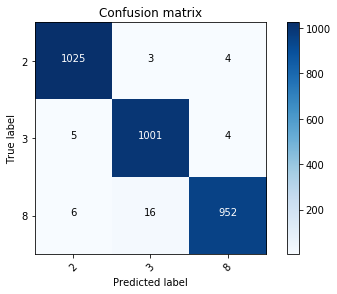

In [9]:
cm =  metrics.confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm ,["2","3","8"])


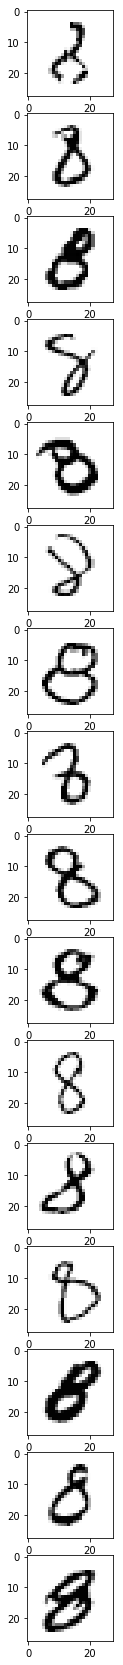

In [10]:
idx = np.where((y_pred == 3) & (y_true == 8))[0]
fig = plt.figure(figsize=(5,30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx),1,i+1)
    imgplot = ax.imshow(np.reshape(x_test[idx[i],:],(28,28)),cmap = plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()